# Project Presentation ML2- Team 2

DATASET

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [ ]:
hf = pd.read_csv("https://raw.githubusercontent.com/Shreeranga1/LinearRegression/main/heart_failure_clinical_records_dataset.csv")

To be consistent with the feature description let's represent the platelets as kiloplatelets/mL

In [ ]:
hf.platelets = hf.platelets/1000

In [ ]:
hf.head()

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]

For brevity creatinine_phosphokinase will be renamed CPK.

In [ ]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(matplotlib.colors.to_rgb(c1))
    c2=np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

meshPalette = []
meshPalette_rev = []
nCol = 50

for i in range(nCol):
    meshPalette.append(colorFader("#71706E", "#990303", i/nCol))
    meshPalette_rev.append(colorFader("#990303","#9C9999", i/nCol))

cm = LinearSegmentedColormap.from_list("cmap_name", meshPalette, N=nCol)
cm_rev = LinearSegmentedColormap.from_list("cmap_name", meshPalette_rev, N=nCol)


Seperating Categorical variable and Numerical variable

In [ ]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   diabetes             299 non-null    int64  
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    int64  
 5   platelets            299 non-null    float64
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    int64  
 9   smoking              299 non-null    int64  
 10  time                 299 non-null    int64  
 11  DEATH_EVENT          299 non-null    int64  
 12  CPK                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Feature distributions

We can see how features are distributed according to label.

In [ ]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

Firstly we plot the numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions

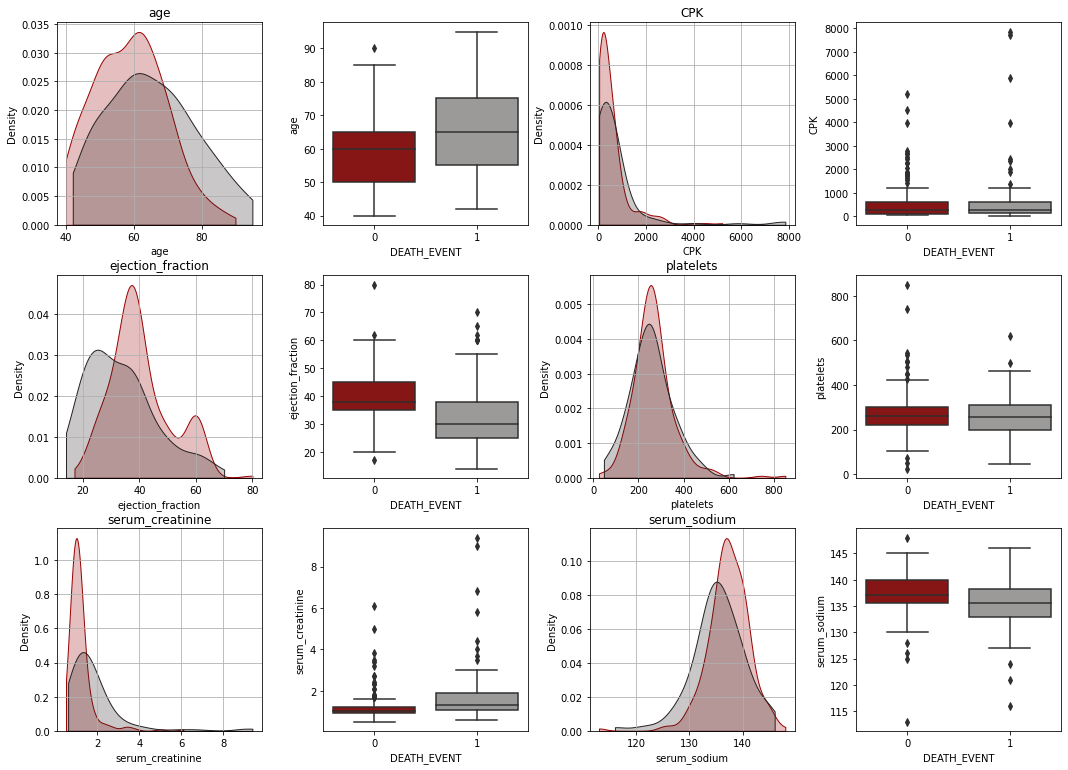

In [ ]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])

Here are reported the categorical features

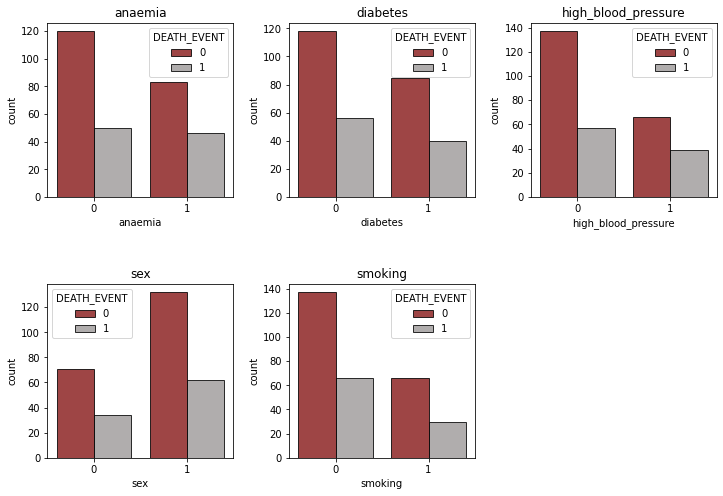

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


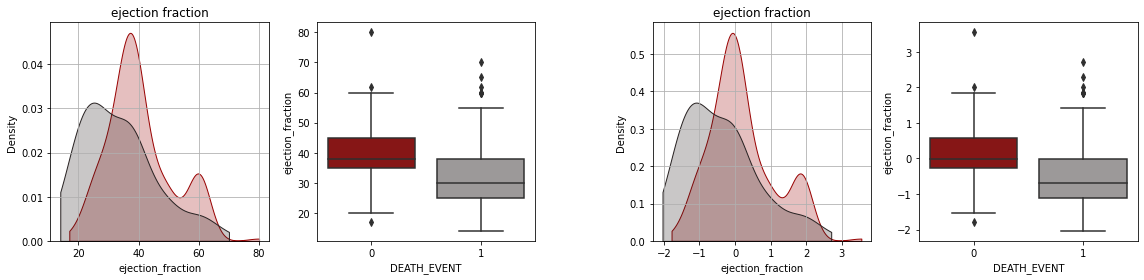

In [ ]:
import matplotlib.image as mpimg
from matplotlib import gridspec

hf_norm = hf.copy()

for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])
    
plt.figure(figsize=(16, 4))
gs  = gridspec.GridSpec(1, 5, width_ratios=[1, 1 ,0.1, 1, 1])
plt.subplot(gs[0])   
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[1]) 
sns.boxplot(y = "ejection_fraction", data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])  
plt.subplot(gs[2])
#plt.imshow(mpimg.imread("img/right_arrow.png"))
plt.axis('off')
plt.subplot(gs[3])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[4])
sns.boxplot(y = "ejection_fraction", data = hf_norm, x="DEATH_EVENT", palette = ["#990303", "#9C9999"]);  
plt.tight_layout()

Correlation matrix 

In [ ]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

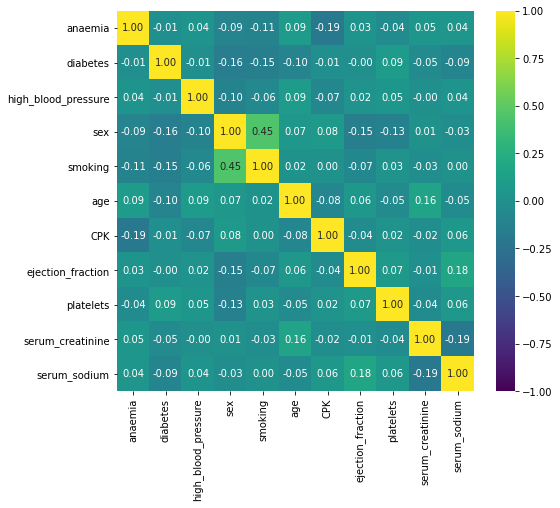

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

Normality assumptions

In [ ]:
from scipy.stats import shapiro

#sw_df = pd.DataFrame(columns=["DEATH_EVENT=0", "DEATH_EVENT=1", "Both"])
index = [(feat, "statistic") for feat in numerical_features]
index.extend([(feat, "p-value") for feat in numerical_features])

index = pd.MultiIndex.from_tuples(index)

sw_df = pd.DataFrame(index=index,  columns = ["Both Classes", "DEATH_EVENT=0", "DEATH_EVENT=1"])

for feat in numerical_features:
    x = hf_norm[feat]
    stat, p = shapiro(x)
    
    sw_df["Both Classes"].loc[(feat, "statistic")] = stat
    sw_df["Both Classes"].loc[(feat, "p-value")] = p
    
    x = hf_norm.loc[hf["DEATH_EVENT"]==0, feat]
    stat, p = shapiro(x)
    sw_df["DEATH_EVENT=0"].loc[(feat, "statistic")] = stat
    sw_df["DEATH_EVENT=0"].loc[(feat, "p-value")] = p
    
    x = hf_norm.loc[hf["DEATH_EVENT"]==1, feat]
    stat, p = shapiro(x)
    sw_df["DEATH_EVENT=1"].loc[(feat, "statistic")] = stat
    sw_df["DEATH_EVENT=1"].loc[(feat, "p-value")] = p
    
sw_df = sw_df.unstack()

In [ ]:
pd.set_option('display.float_format', '{:.3g}'.format)
sw_df

Both Classes            ... DEATH_EVENT=1          
                       p-value statistic  ...       p-value statistic
CPK                   7.05e-28     0.514  ...      1.99e-17     0.439
age                   5.35e-05     0.975  ...        0.0221     0.969
ejection_fraction     7.22e-09     0.947  ...      4.54e-05     0.927
platelets             2.88e-12     0.912  ...        0.0336     0.971
serum_creatinine      5.39e-27     0.551  ...      1.28e-14     0.608
serum_sodium          9.22e-10     0.939  ...       0.00384     0.958

[6 rows x 6 columns]

Validate the models

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
train_ratio = 0.75
val_ratio = 0.25

ho_train_df, ho_val_df = train_test_split(hf_norm, train_size = train_ratio, random_state=42)
unnorm_ho_train_df, unnorm_ho_val_df = train_test_split(hf, train_size = train_ratio, random_state=42)

print("Holdout split:")
print(f"Train samples: {len(ho_train_df)}")
print(f"Validation/Test samples: {len(ho_val_df)}")

Holdout split:
Train samples: 224
Validation/Test samples: 75


# Feature selection

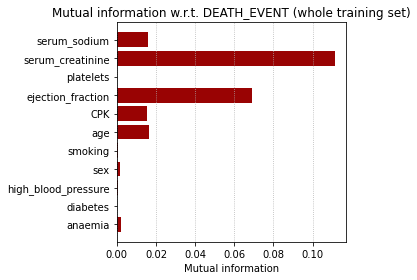

In [ ]:
from sklearn.feature_selection import mutual_info_classif

    
MI = (mutual_info_classif(ho_train_df[all_features],
                             ho_train_df["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))

plt.figure(figsize=(5.4, 4))
plt.barh(y=all_features, width=MI, color="#990303")
plt.title("Mutual information w.r.t. DEATH_EVENT (whole training set)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

Chi-squared test

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print("Observed")
ctable = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
ctable.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
ctable.index = ["anaemia=0", "anaemia=1"]
ctable.loc["Total"] = ctable.sum()
ctable["Total"] = ctable.sum(axis=1)
ctable

Observed


DEATH_EVENT=0  DEATH_EVENT=1  Total
anaemia=0             94             34    128
anaemia=1             65             31     96
Total                159             65    224

In [ ]:
print("Expected")
contingency_table = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
stat, p, dof, expected = chi2_contingency(contingency_table)
expected = pd.DataFrame(expected)
expected.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
expected.index = ["anaemia=0", "anaemia=1"]
expected

Expected


DEATH_EVENT=0  DEATH_EVENT=1
anaemia=0           90.9           37.1
anaemia=1           68.1           27.9

Now that we have the statistic we could compare it with a chi2 distribution with those given degrees of freedom, fixing an alpha value and keeping only the features that produce a lower p-value (rejected).

In [ ]:
def chi2_test(df, feat1, feat2):

    contingency_table = pd.crosstab(df[feat1], df[feat2])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    prob = 0.95 # alpha=0.05
    critical = chi2.ppf(prob, dof)
    #print('alpha=%.3f, critical_value=%.3f,\nstat=%.3f' % (1 - prob, critical, stat))

    # interpret p-value
    alpha = 1.0 - prob
    
    return stat, p

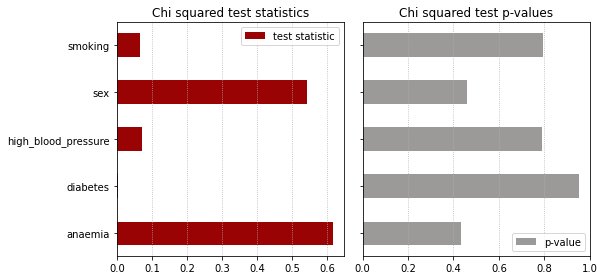

In [ ]:
stats = []
p_values = []

for feat in categorical_features:
        
    stat, p = chi2_test(ho_train_df, feat, "DEATH_EVENT")
    stats.append(stat)
    p_values.append(p)        

fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical_features, width=stats, color="#990303", label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")

axes[1].barh(y=categorical_features, width=p_values, color="#9C9999", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")

axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');

axes[0].legend(loc=1)
axes[1].legend(loc=4)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

KFold case

In [ ]:
kfold_train_df, kfold_val_df = ho_train_df.copy(), ho_val_df.copy()

all_features = ['anaemia', 'sex', 'age', 'CPK',
                'ejection_fraction', 'serum_creatinine', 'serum_sodium']


Mutual information with respect to DEATH_EVENT (5 folds)


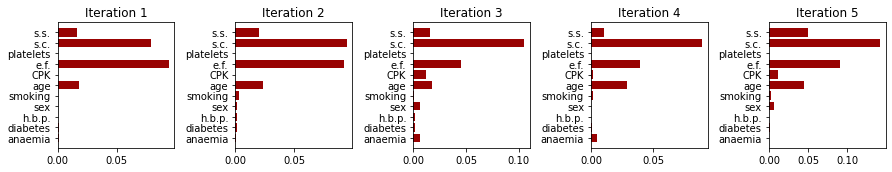

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(12.5, 2.5))

print("Mutual information with respect to DEATH_EVENT (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    MI=(mutual_info_classif(kfold_train_df.iloc[train_idx][categorical_features+numerical_features],
                             kfold_train_df.iloc[train_idx]["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.','sex', 'smoking', 'age', 'CPK', 'e.f.', 'platelets',
         's.c.', 's.s.'], width=MI, color="#990303", label="test statistic")
    
plt.tight_layout()

Chi squared test statistics (5 folds)


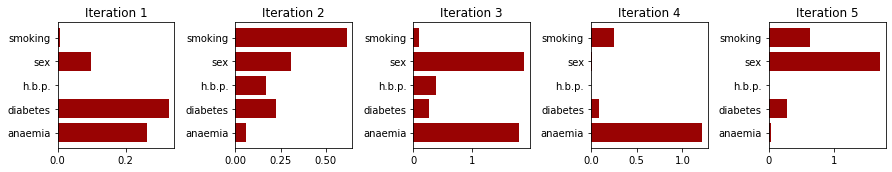

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(12.5, 2.5))
print("Chi squared test statistics (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    stats = []
    p_values = []

    for feat in categorical_features:

        stat, p = chi2_test(kfold_train_df.iloc[train_idx], feat, "DEATH_EVENT")
        stats.append(stat)
        p_values.append(p)
    
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.', 'sex', 'smoking'], width=stats, color="#990303", label="test statistic")
plt.tight_layout()

In [ ]:
numerical_features = ['age', 'CPK', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
all_features_kfold = [
    ["anaemia", "diabetes"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
    ["anaemia", "sex"]+numerical_features,
    ["anaemia", "smoking"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
]

Class imbalance

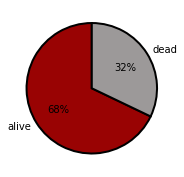

In [ ]:
plt.figure(figsize=(3, 3))
plt.pie(hf["DEATH_EVENT"].value_counts(),
        labels = ["alive", "dead"],
        colors = ["#990303", "#9C9999"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

Random oversampling

In [ ]:
n_to_sample = len(ho_train_df[ho_train_df.DEATH_EVENT==0]) - len(ho_train_df[ho_train_df.DEATH_EVENT==1])
new_samples = ho_train_df[ho_train_df.DEATH_EVENT==1].sample(n_to_sample, replace=True, random_state=42)

ho_train_df_rs = ho_train_df.append(new_samples)

new_samples = unnorm_ho_train_df[unnorm_ho_train_df.DEATH_EVENT==1].sample(n_to_sample, replace=True, random_state=42)
unnorm_ho_train_df_rs = unnorm_ho_train_df.append(new_samples)

Here we can see the distribution of ejection_fraction for only under-represented class samples before and after oversampling. (the line is a kde)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


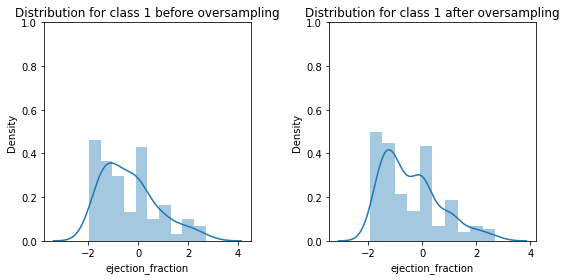

In [ ]:
nbins = 10
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Distribution for class 1 before oversampling")
sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("Distribution for class 1 after oversampling")
sns.distplot(ho_train_df_rs[ho_train_df_rs.DEATH_EVENT==1].ejection_fraction, bins=nbins);
plt.tight_layout()

Smote

In [ ]:
def rand_jitter(arr):
    np.random.seed(42)
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [ ]:
norm = np.linalg.norm
import random
from random import sample 

def SMOTE(data, sampling_rate, n_neigh, random_state=42):
    random.seed(random_state)
    new_samples = []
    
    if sampling_rate==0:
        return
    
    if sampling_rate>n_neigh: return      
    data = data.reset_index(drop=True)

    n_samples = data.count()[0]

    for i in range(n_samples):
        dists = []
        for j in range(n_samples):
            if i==j: continue
            dists.append((j, norm(data.loc[i]-data.loc[j])))    
        
        topk = sorted(dists, key=lambda s: s[1])[:n_neigh]
        neighs = sample(topk, sampling_rate)

        for neigh in neighs:
            alpha = random.random()
            new_samples.append(data.loc[i] + alpha * (data.loc[neigh[0]]-data.loc[i]))
            
    return new_samples

In [ ]:
n_to_sample = len(ho_train_df[ho_train_df.DEATH_EVENT==0]) - len(ho_train_df[ho_train_df.DEATH_EVENT==1])
new_samples = SMOTE(ho_train_df[ho_train_df["DEATH_EVENT"]==1][all_features],
                    sampling_rate = 1, n_neigh = 50)

# categorical attributes need to be fixed
for s in new_samples:
    s["anaemia"] = np.round(s["anaemia"])
    s["sex"] = np.round(s["sex"])

ho_train_df_sm = ho_train_df.append(new_samples)
ho_train_df_sm["DEATH_EVENT"].fillna(1, inplace=True)


new_samples = SMOTE(unnorm_ho_train_df[unnorm_ho_train_df["DEATH_EVENT"]==1][all_features],
                    sampling_rate = 1, n_neigh = 50)

# categorical attributes need to be fixed
for s in new_samples:
    s["anaemia"] = np.round(s["anaemia"])
    s["sex"] = np.round(s["sex"])

unnorm_ho_train_df_sm = unnorm_ho_train_df.append(new_samples)
unnorm_ho_train_df_sm["DEATH_EVENT"].fillna(1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


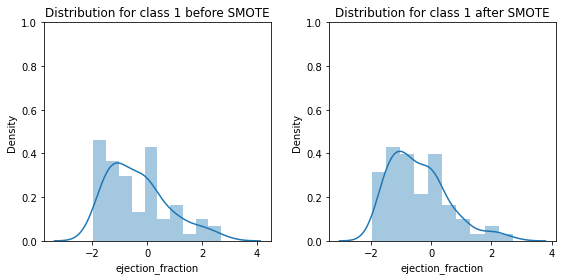

In [ ]:
nbins = 10
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Distribution for class 1 before SMOTE")
sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("Distribution for class 1 after SMOTE")
sns.distplot(ho_train_df_sm[ho_train_df_sm.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.tight_layout();

In [ ]:
w = len(ho_train_df) / (2 * np.bincount(ho_train_df.DEATH_EVENT))
print(f"class 0: {w[0]} \nclass 1: {w[1]}")

class 0: 0.7044025157232704 
class 1: 1.7230769230769232


In [ ]:
# KFOLD

class KFold():
    
    # caching smote results 
    smote_folds = None
    smote_labels = None
    
    def __init__(self, all_features_kfold, random_state=42):
        self.smote_folds = []
        self.smote_labels = []
        self.features = all_features_kfold
        
        self.kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    def fit_predict(self, model, X, y, threshold = None, resampling = None, cached = False):
        acc, rec, pre, f1 = 0, 0, 0, 0
        
        if resampling=="SMOTE" and not cached:
            self.smote_folds = []
            self.smote_labels = []
        
        for i, (train_idx, val_idx) in enumerate(kf.split(X, y)):
           
            X_fold = X[self.features[i]] # for each fold we have different features
        
            X_train, X_val = X_fold.iloc[train_idx], X_fold.iloc[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            if resampling=="oversampling":
                n_to_sample = len(X_train[y_train==0]) - len(X_train[y_train==1])
                new_samples = X_train[y_train==1].sample(n_to_sample, replace=True, random_state=42)
                
                X_train = X_train.append(new_samples)
                y_train = y_train.append(pd.Series([1]*len(new_samples)))
                
                X_train = X_train.reset_index(drop=True)
                y_train = y_train.reset_index(drop=True)

            if resampling=="SMOTE": 
                if not cached or len(self.smote_folds)<5 or len(self.smote_labels)<5:
                    n_to_sample = len(X_train[y_train==0]) - len(X_train[y_train==1])
                    new_samples = SMOTE(X_train[y_train==1], sampling_rate = 1, n_neigh = 50)

                    # categorical attributes need to be fixed
                    for s in new_samples:
                        if "anaemia" in  s.index:
                            s["anaemia"] = np.round(s["anaemia"])
                        if "high_blood_pressure" in s.index:
                            s["high_blood_pressure"] = np.round(s["high_blood_pressure"])
                        if "sex" in  s.index:
                            s["sex"] = np.round(s["sex"])
                        if "smoking" in  s.index:
                            s["smoking"] = np.round(s["smoking"])
                        if "diabetes" in  s.index:
                            s["diabetes"] = np.round(s["diabetes"])
                                            
                    X_train = X_train.append(new_samples, ignore_index=True)
                    y_train = y_train.append(pd.Series([1]*len(new_samples)))
                    
                    X_train = X_train.reset_index(drop=True)
                    y_train = y_train.reset_index(drop=True)
                    
                    # cache smoted folds
                    self.smote_folds.append(X_train)
                    self.smote_labels.append(y_train)
                    
                else:
                    # use cached folds
                    X_train = self.smote_folds[i]
                    y_train = self.smote_labels[i]

            model.fit(X_train, y_train)
            preds = model.predict(X_val)

            if threshold:
                preds[preds>=threshold] = 1
                preds[preds<threshold] = 0

            acc += accuracy_score(y_val, preds)
            pre += precision_score(y_val, preds)
            rec += recall_score(y_val, preds)
            f1 += f1_score(y_val, preds)

        acc /= 5
        pre /= 5
        rec /= 5
        f1 /= 5
        return acc, pre, rec, f1

In [ ]:
# initialize kfold object
kfold = KFold(all_features_kfold, random_state=42)

# Model Classification 

Now will follow a series of different models used to perform classification of the DEATH_EVENT

Decision tree

Random forest

Linear regression

Logistic regression

K nearest neighbors

Naive bayes

All models are evaluated considering the following metrics

accuracy=(TP+TN)/(TP+TN+FP+FN)

precision=TP/(TP+FP)

recall=TP/(TP+FN)

F1=2×[(precision × recall)/(precision + recall)]

ROC curve and AUC is also evaluated 

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve

In [ ]:
final_results = pd.DataFrame(columns=["Model", "Holdout Original","Holdout Oversampling", "Holdout SMOTE", 
                   "Holdout class-weight=balanced", "KFold Original", "KFold Oversampling",
                   "KFold SMOTE", "KFold class-weight=balanced"])

# Decision Tree

Decision trees are one of the most widely known machine learning models.


The measure used in this case is the Gini Index 

![image.png](attachment:image.png)

where p is the ratio between number of samples of class j and total number of samples.

The main drawback of decision tree
simple model,lower values of accuracy and easy to overfit

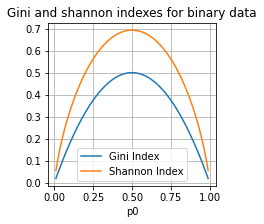

In [ ]:
p = np.linspace(1e-2, 1-1e-2, 100)

plt.figure(figsize=(3, 3))
plt.plot(p, [1-pj**2-(1-pj)**2 for pj in p], label="Gini Index")
plt.plot(p, [-((pj*np.log(pj))+((1-pj)*np.log(1-pj))) for pj in p], label="Shannon Index")
plt.grid()
plt.legend();
plt.xlabel("p0")
plt.title("Gini and shannon indexes for binary data");

Here s.c stands for serum creatinine while e.j. stands for ejection fraction.

In [ ]:
%matplotlib notebook
plt.ioff()
fig, (ax1, ax2) = plt.subplots(1, 2);
%matplotlib inline 
plt.ion()

depth = range(1, 6)
h = 0.03
x_min, x_max = hf["ejection_fraction"].min() - 1, hf["ejection_fraction"].max() + 1
y_min, y_max = hf["serum_creatinine"].min() - .5, hf["serum_creatinine"].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

fig.set_size_inches(14, 7);
def animate_func(i):
    
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=depth[i], random_state=42, )
    dt.fit(hf[["ejection_fraction", "serum_creatinine"]], hf.DEATH_EVENT)
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax1.clear()
    ax1.contourf(xx, yy, Z, alpha=0.5, cmap=cm_rev)
    ax1.scatter(hf[hf["DEATH_EVENT"]==0]["ejection_fraction"],
                hf[hf["DEATH_EVENT"]==0]["serum_creatinine"], label="alive", color="#990303", edgecolor='BLACK')
    ax1.scatter(hf[hf["DEATH_EVENT"]==1]["ejection_fraction"],
                hf[hf["DEATH_EVENT"]==1]["serum_creatinine"], label="dead", color="#9C9999", edgecolor='BLACK')

    ax1.set_xlabel("ejection_fraction")
    ax1.set_ylabel("serum_creatinine")
    ax1.legend();
    
    tree.plot_tree(dt,  feature_names=["e.f.", "s.c."], filled=True,
                   label='none', ax=ax2, rounded=True, proportion=True, impurity=False);
    ax2.set_title(f"Decision tree (depth: {i+1})")
    
    fig.tight_layout()
    return [fig]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(depth),
                               interval = 200, # in ms
                               );
display(HTML(anim.to_jshtml()))

In [ ]:
depth = range(1, 12)

rs_acc, rs_rec, rs_pre, rs_f1 = [], [], [], []
sm_acc, sm_rec, sm_pre, sm_f1 = [], [], [], []
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1 = [], [], [], []
w_acc, w_rec, w_pre, w_f1 = [], [], [], []

for d in depth: 
    # random oversampling 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    dt.fit(unnorm_ho_train_df_rs[all_features], unnorm_ho_train_df_rs['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    rs_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    rs_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    rs_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    rs_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    
    # SMOTE 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    dt.fit(unnorm_ho_train_df_sm[all_features], unnorm_ho_train_df_sm['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    sm_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    sm_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    sm_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    sm_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    
    # not resampled
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    dt.fit(unnorm_ho_train_df[all_features], unnorm_ho_train_df['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    no_rs_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    no_rs_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    no_rs_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    no_rs_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
 
    # weighted classes
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight='balanced')
    dt.fit(unnorm_ho_train_df[all_features], unnorm_ho_train_df['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    w_acc.append(accuracy_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    w_rec.append(recall_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    w_pre.append(precision_score(unnorm_ho_val_df["DEATH_EVENT"], pred))
    w_f1.append(f1_score(unnorm_ho_val_df["DEATH_EVENT"], pred))

In [ ]:
#sorted([(a, b) for a, b in zip(no_rs_acc, no_rs_f1)], key= lambda a: a[0]+a[1])[-1];

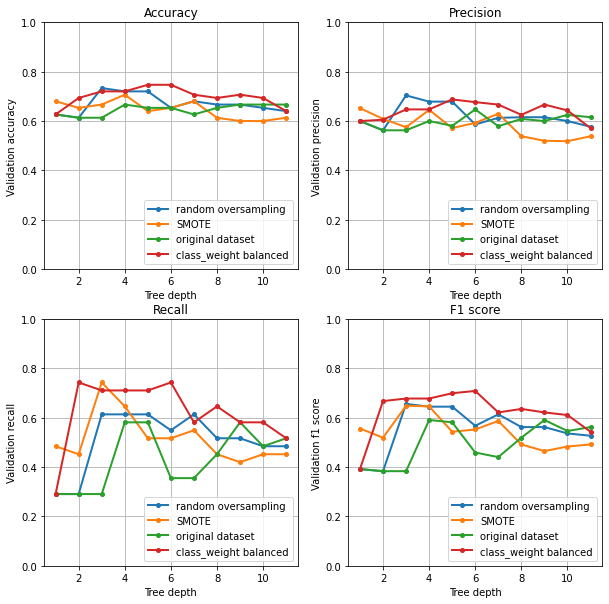

In [ ]:
plt.figure(figsize=(10, 10))

# accuracy
plt.subplot(2, 2, 1)    
plt.plot(list(depth), rs_acc, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_acc, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_acc, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_acc, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation accuracy")
plt.xlabel("Tree depth")
plt.title("Accuracy")

# precision
plt.subplot(2, 2, 2)    
plt.plot(list(depth), rs_pre, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_pre, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_pre, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_pre, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation precision")
plt.xlabel("Tree depth")
plt.title("Precision")

# recall
plt.subplot(2, 2, 3)    
plt.plot(list(depth), rs_rec, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_rec, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_rec, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_rec, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation recall")
plt.xlabel("Tree depth")
plt.title("Recall")

# f1 score
plt.subplot(2, 2, 4)    
plt.plot(list(depth), rs_f1, label="random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), sm_f1, label="SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), no_rs_f1, label = "original dataset", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), w_f1, label = "class_weight balanced", marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation f1 score")
plt.xlabel("Tree depth")
plt.title("F1 score");

The best model seems to be the decision tree on the original dataset with class_weight = balanced with a depth of 6.

In [ ]:
# KFOLD

rs_acc, rs_rec, rs_pre, rs_f1 = [], [], [], []
sm_acc, sm_rec, sm_pre, sm_f1 = [], [], [], []
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1 = [], [], [], []
w_acc, w_rec, w_pre, w_f1 = [], [], [], []

for d in depth: 
    # random oversampling 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                          resampling="oversampling")
    rs_acc.append(acc)
    rs_rec.append(rec)
    rs_pre.append(pre)
    rs_f1.append(f1)
    
    # SMOTE 
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                          cached=True, resampling="SMOTE")
    sm_acc.append(acc)
    sm_rec.append(rec)
    sm_pre.append(pre)
    sm_f1.append(f1)
    
    # not resampled
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight=None)
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'])
    no_rs_acc.append(acc)
    no_rs_rec.append(rec)
    no_rs_pre.append(pre)
    no_rs_f1.append(f1)
 
    # weighted classes
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42, class_weight='balanced')
    acc, rec, pre, f1 = kfold.fit_predict(dt, ho_train_df, ho_train_df['DEATH_EVENT'])
    w_acc.append(acc)
    w_rec.append(rec)
    w_pre.append(pre)
    w_f1.append(f1)

In [ ]:
#sorted([(a, b) for a, b in zip(w_acc, w_f1)], key= lambda a: a[0]+a[1]);

In [ ]:
%matplotlib notebook
plt.ioff()
fig, ax = plt.subplots(1, 1);
%matplotlib inline 
plt.ion()

fig.set_size_inches(20, 15);
def animate_func(i):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i+1, random_state=42, class_weight='balanced')
    dt.fit(unnorm_ho_train_df[all_features], unnorm_ho_train_df['DEATH_EVENT'])
    pred = dt.predict(unnorm_ho_val_df[all_features])
    
    tree.plot_tree(dt,  feature_names=all_features, filled=True, label='all', ax=ax, rounded=True, proportion=True);
    ax.set_title(f"Decision tree (depth: {i+1})", fontsize=25)
    # value are float variables due to class_weight="balanced"
    return [fig]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = 11,
                               interval = 200, # in ms
                               );

HTML(anim.to_jshtml())

# Random Forest

Random forest is an ensemble model based on a number of decision trees.
Here Prediction is then done by majority voting.

In [ ]:
# oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

max_features='sqrt' # square root of number of features       
max_depth = 14
depth = range(1, max_depth)
n_trees = [5, 10, 20, 50, 100]
n_vals = len(n_trees)

rs_acc, rs_oob_acc, rs_rec, rs_pre, rs_f1= [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
sm_acc, sm_oob_acc, sm_rec, sm_pre, sm_f1 = [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
no_rs_acc, no_rs_oob_acc, no_rs_rec, no_rs_pre, no_rs_f1= [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals
w_acc, w_oob_acc, w_rec, w_pre, w_f1 = [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals, [None]*n_vals

for i,n in enumerate(n_trees):
    
    rs_acc[i], rs_oob_acc[i], rs_rec[i], rs_pre[i], rs_f1[i] = [], [], [], [], []
    sm_acc[i], sm_oob_acc[i], sm_rec[i], sm_pre[i], sm_f1[i] = [], [], [], [], []
    no_rs_acc[i], no_rs_oob_acc[i], no_rs_rec[i], no_rs_pre[i], no_rs_f1[i] = [], [], [], [], []
    w_acc[i], w_oob_acc[i], w_rec[i], w_pre[i], w_f1[i] = [], [], [], [], []

    for d in depth: 
        # random oversampling
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight=None)
        
        rf.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        rs_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        rs_oob_acc[i].append(rf.oob_score_)
        rs_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        rs_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        rs_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))

        # SMOTE
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight=None)

        rf.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        sm_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        sm_oob_acc[i].append(rf.oob_score_)
        sm_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        sm_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        sm_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))
        
        # no random oversampling
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight=None)

        rf.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        no_rs_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        no_rs_oob_acc[i].append(rf.oob_score_)
        no_rs_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        no_rs_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        no_rs_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))

        # class weight
        rf = RandomForestClassifier(n_estimators=n, criterion='gini', max_depth=d, max_features=max_features,
                                    oob_score=True, random_state=42, class_weight='balanced')

        rf.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT']);
        pred = rf.predict(ho_val_df[all_features]);
        w_acc[i].append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
        w_oob_acc[i].append(rf.oob_score_)
        w_rec[i].append(recall_score(ho_val_df["DEATH_EVENT"], pred))
        w_pre[i].append(precision_score(ho_val_df["DEATH_EVENT"], pred))
        w_f1[i].append(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [ ]:
%matplotlib notebook
plt.ioff()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2);
%matplotlib inline 
plt.ion()

In [ ]:
fig.set_size_inches(7, 7);
def animate_func(i):  
    # accuracy
    ax1.clear();
    ax1.plot(list(depth), rs_acc[i], label="random oversampling", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), sm_acc[i], label="SMOTE", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), no_rs_acc[i], label = "original dataset", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), w_acc[i], label = "class_weight balanced", linewidth=1.5, marker='o', markersize=3);

    ax1.plot(list(depth), rs_oob_acc[i], label="random oversampling OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#287CB7");
    ax1.plot(list(depth), sm_oob_acc[i], label="SMOTE OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#FE8417");
    ax1.plot(list(depth), no_rs_oob_acc[i], label = "original dataset OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#34A334");
    ax1.plot(list(depth), w_oob_acc[i], label = "class_weight balanced OOB", linewidth=1, linestyle='dashed', alpha=0.8, color = "#D62728");

    ax1.legend(fontsize=7, loc=3);
    ax1.grid(True);
    ax1.set_ylim(0, 1);
    ax1.set_ylabel("Validation accuracy");
    ax1.set_xlabel("Single tree depth");
    ax1.set_title(f"Accuracy (n_trees: {n_trees[i]})");

    # precision
    ax2.clear();
    ax2.plot(list(depth), rs_pre[i], label="random oversampling", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), sm_pre[i], label="SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), no_rs_pre[i], label = "original dataset", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), w_pre[i], label = "class_weight balanced", marker='o', linewidth=1.5, markersize=3);

    ax2.legend(fontsize=7, loc=3);
    ax2.grid(True);
    ax2.set_ylim(0, 1);
    ax2.set_ylabel("Validation precision");
    ax2.set_xlabel("Single tree depth");
    ax2.set_title(f"Precision (n_trees: {n_trees[i]})");

    # recall
    ax3.clear();
    ax3.plot(list(depth), rs_rec[i], label="random oversampling", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), sm_rec[i], label="SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), no_rs_rec[i], label = "original dataset", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), w_rec[i], label = "class_weight balanced", marker='o', linewidth=1.5, markersize=3);

    ax3.legend(fontsize=7, loc=4);
    ax3.grid(True);
    ax3.set_ylim(0, 1);
    ax3.set_ylabel("Validation recall");
    ax3.set_xlabel("Single tree depth");
    ax3.set_title(f"Recall (n_trees: {n_trees[i]})");

    # f1 score
    ax4.clear();
    ax4.plot(list(depth), rs_f1[i], label="random oversampling", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), sm_f1[i], label="SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), no_rs_f1[i], label = "original dataset", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), w_f1[i], label = "class_weight balanced", marker='o', linewidth=1.5, markersize=3);

    ax4.legend(fontsize=7, loc=4);
    ax4.grid(True);
    ax4.set_ylim(0, 1);
    ax4.set_ylabel("Validation f1 score");
    ax4.set_xlabel("Single tree depth");
    ax4.set_title(f"F1 score (n_trees: {n_trees[i]})");
    
    fig.tight_layout()
    return [fig];

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = n_vals,
                               interval = 100, # in ms
                               );
HTML(anim.to_jshtml())

# Linear Regression

In [ ]:
# holdout

threshold=0.5

# oversampled 
lr = LinearRegression(fit_intercept=True)
lr.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_rs = pred.copy()
pred[pred>=0.5]=1
pred[pred<0.5]=0
rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
    
# SMOTE 
lr = LinearRegression(fit_intercept=True)
lr.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_sm = pred.copy()
pred[pred>=0.5]=1
pred[pred<0.5]=0
sm_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
sm_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
sm_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
sm_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
    
# not oversampled
lr = LinearRegression(fit_intercept=True)
lr.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_no_rs = pred.copy()
pred[pred>=0.5]=1
pred[pred<0.5]=0
no_rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [ ]:
# oversampled 
lr = LinearRegression(fit_intercept=True)
rs_acc, rs_rec, rs_pre, rs_f1 = kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5, resampling="oversampling")
    
# SMOTE 
lr = LinearRegression(fit_intercept=True)
sm_acc, sm_rec, sm_pre, sm_f1 = kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5, resampling="SMOTE", cached=True)
    
# not oversampled
lr = LinearRegression(fit_intercept=True)
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1= kfold.fit_predict(lr, ho_train_df, ho_train_df['DEATH_EVENT'], threshold=0.5)

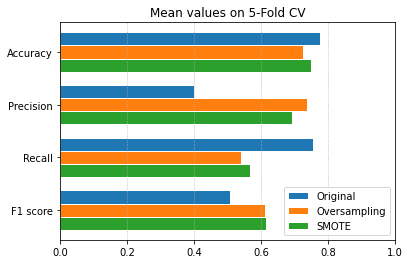

In [ ]:
# https://python-graph-gallery.com/11-grouped-barplot/

fig = plt.figure(figsize=(6, 4))
barWidth = 0.25
space=0.0
 
bars1 = [no_rs_f1, no_rs_rec, no_rs_pre, no_rs_acc]
bars2 = [rs_f1, rs_rec, rs_pre, rs_acc]
bars3 = [sm_f1, sm_rec, sm_pre, sm_acc]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]
r3 = [x + barWidth + space for x in r2]

plt.barh(r3, bars1, label="Original",height=barWidth, edgecolor='white')
plt.barh(r2, bars2, label="Oversampling", height=barWidth, edgecolor='white')
plt.barh(r1, bars3, label="SMOTE", height=barWidth, edgecolor='white')

plt.title("Mean values on 5-Fold CV")
plt.yticks([r + barWidth for r in range(len(bars1))], ["F1 score", "Recall", "Precision", "Accuracy"])
plt.xlim(0, 1)
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

In [ ]:
# area under the curve evaluation
def roc_area(tpr, fpr):
    area = 0
    for i in range(len(tpr)-1):
        base = fpr[i+1]-fpr[i]
        h = tpr[i]
        area += base*h
        
    return round(area, 3)

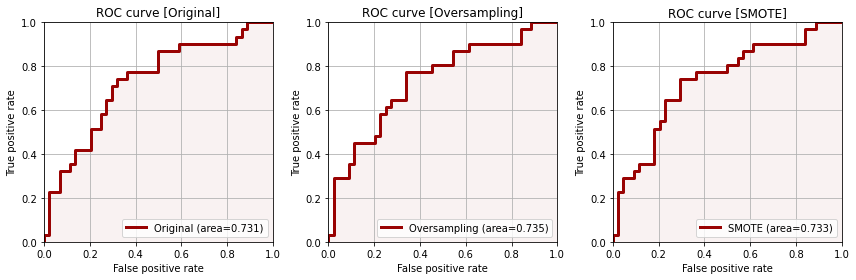

In [ ]:
fpr_rs, tpr_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_rs)
fpr_no_rs, tpr_no_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_no_rs)
fpr_sm, tpr_sm, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_sm)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(fpr_no_rs, tpr_no_rs, label=f"Original (area={roc_area(tpr_no_rs, fpr_no_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Original]")
plt.fill_between(fpr_no_rs, 0, tpr_no_rs, alpha=0.05, color='#990303')

plt.subplot(1, 3, 2)
plt.plot(fpr_rs, tpr_rs, label=f"Oversampling (area={roc_area(tpr_rs, fpr_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Oversampling]")
plt.fill_between(fpr_rs, 0, tpr_rs, alpha=0.05, color='#990303')

plt.subplot(1, 3, 3)
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (area={roc_area(tpr_sm, fpr_sm)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [SMOTE]")
plt.fill_between(fpr_sm, 0, tpr_sm, alpha=0.05, color='#990303');

plt.tight_layout()

# Logistic Regression

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
c = 1
penalty = "l2"
solver = "liblinear"
multi_class = "auto"
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

## Firstly lets go random sampling data rs=Random_Sample (Print out sample training data)

In [ ]:
ho_train_df_rs[all_features][1:5]

anaemia  sex    age  ...  ejection_fraction  serum_creatinine  serum_sodium
78         1    1   1.19  ...           -0.00708            -0.769         -1.28
66         1    0  -1.59  ...              -1.95           -0.0909        -0.142
296        0    0  -1.33  ...               1.85            -0.575         0.312
192        1    1 -0.912  ...              0.162            -0.672          -1.5

[4 rows x 7 columns]

Print out test data

In [ ]:
ho_train_df_rs['DEATH_EVENT'][1:5]

78     0
66     1
296    0
192    0
Name: DEATH_EVENT, dtype: int64

In [ ]:
lr.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ho_val_df[all_features][1:3]

anaemia  sex    age  ...  ejection_fraction  serum_creatinine  serum_sodium
265        1    1 -0.912  ...             -0.261            -0.478         0.766
164        0    1  -1.33  ...             -0.684            -0.285         0.539

[2 rows x 7 columns]

In [ ]:
pred = lr.predict(ho_val_df[all_features])

In [ ]:
raw_pred_rs = lr.predict_proba(ho_val_df[all_features])[:, 1]

In [ ]:
pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1])

now let us check the accuracy,f1_score,recall_score and precision score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve

Accuracy=correct_predictions / total_predictions

In [ ]:
rs_acc=accuracy_score(ho_val_df['DEATH_EVENT'],pred)
print(rs_acc)

0.7066666666666667


In [ ]:
rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
print(rs_rec)

0.6451612903225806


In [ ]:
rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
print(rs_pre)

0.6451612903225806


In [ ]:
rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
print(rs_f1)

0.6451612903225806


In [ ]:
Logistic_regression_data={"Col":['Accuracy','Recall','Precision','F1'],"RandomSampling":[rs_acc,rs_acc,rs_pre,rs_f1]}
Logistic_regression_data=pd.DataFrame.from_dict(Logistic_regression_data)

In [ ]:
Logistic_regression_data

Col  RandomSampling
0   Accuracy           0.707
1     Recall           0.707
2  Precision           0.645
3         F1           0.645

## now lets check the logisctic regression on Smote train and test data

In [ ]:
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

Lets check how the smote data looks 

In [ ]:
ho_train_df_sm[all_features][0:4]

anaemia  sex   age  ...  ejection_fraction  serum_creatinine  serum_sodium
225        0    0  1.19  ...               1.85           0.00593         -2.64
78         1    1  1.19  ...           -0.00708            -0.769         -1.28
66         1    0 -1.59  ...              -1.95           -0.0909        -0.142
296        0    0 -1.33  ...               1.85            -0.575         0.312

[4 rows x 7 columns]

In [ ]:
ho_train_df_sm['DEATH_EVENT'][0:4]

225   0
78    0
66    1
296   0
Name: DEATH_EVENT, dtype: float64

In [ ]:
ho_train_df_sm['DEATH_EVENT'].value_counts()

0    159
1    130
Name: DEATH_EVENT, dtype: int64

In [ ]:
ho_val_df['DEATH_EVENT'].value_counts()

0    44
1    31
Name: DEATH_EVENT, dtype: int64

In [ ]:
lr.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(ho_val_df[all_features])
raw_pred_sm = lr.predict_proba(ho_val_df[all_features])[:, 1]

accuracy,f1_score,recall_score and precision score for SMOTE data 

In [ ]:
sm_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
sm_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
sm_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
sm_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
print(sm_acc)
print(sm_rec)
print(sm_pre)
print(sm_f1)

0.7333333333333333
0.6451612903225806
0.6896551724137931
0.6666666666666667


In [ ]:
df2=pd.DataFrame.from_dict({'Smote_results':[sm_acc,sm_rec,sm_pre,sm_f1]})
Logistic_regression_data=pd.concat([Logistic_regression_data,df2],axis=1)
Logistic_regression_data

Col  RandomSampling  Smote_results
0   Accuracy           0.707          0.733
1     Recall           0.707          0.645
2  Precision           0.645           0.69
3         F1           0.645          0.667

## Now lets check for non over sampled 

In [ ]:
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

lr.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_no_rs = lr.predict_proba(ho_val_df[all_features])[:, 1]

In [ ]:
no_rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [ ]:
df3=pd.DataFrame.from_dict({'Smote_results':[no_rs_acc,no_rs_rec,no_rs_pre,no_rs_f1]})
Logistic_regression_data=pd.concat([Logistic_regression_data,df3],axis=1)
Logistic_regression_data

Col  RandomSampling  Smote_results  Smote_results
0   Accuracy           0.707          0.733          0.667
1     Recall           0.707          0.645          0.323
2  Precision           0.645           0.69          0.714
3         F1           0.645          0.667          0.444

In [ ]:
fpr_rs, tpr_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_rs)
fpr_no_rs, tpr_no_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_no_rs)
fpr_sm, tpr_sm, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_sm)

In [ ]:
def roc_area(tpr, fpr):
    area = 0
    for i in range(len(tpr)-1):
        base = fpr[i+1]-fpr[i]
        h = tpr[i]
        area += base*h
        
    return round(area, 3)

Lets create ROC_Area

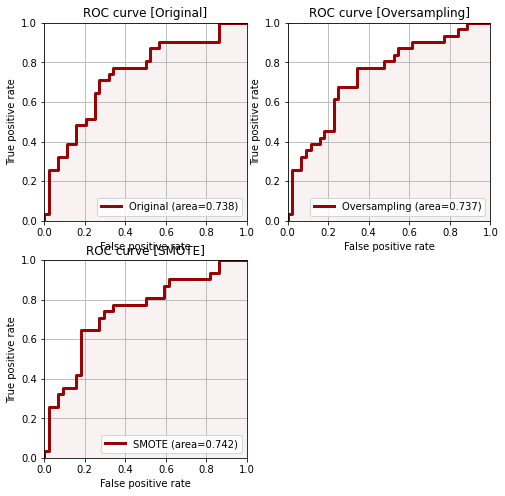

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(fpr_no_rs, tpr_no_rs, label=f"Original (area={roc_area(tpr_no_rs, fpr_no_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Original]")
plt.fill_between(fpr_no_rs, 0, tpr_no_rs, alpha=0.05, color='#990303')

plt.subplot(2, 2, 2)
plt.plot(fpr_rs, tpr_rs, label=f"Oversampling (area={roc_area(tpr_rs, fpr_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Oversampling]")
plt.fill_between(fpr_rs, 0, tpr_rs, alpha=0.05, color='#990303')

plt.subplot(2, 2, 3)
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (area={roc_area(tpr_sm, fpr_sm)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [SMOTE]")
plt.fill_between(fpr_sm, 0, tpr_sm, alpha=0.05, color='#990303')

# K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
n_neigh = range(1, 21, 2)
n = len(n_neigh)

In [ ]:
rs_acc, rs_rec, rs_pre, rs_f1 = [], [], [], []
sm_acc, sm_rec, sm_pre, sm_f1 = [], [], [], []
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1 = [], [], [], []
rs_raw_pred, sm_raw_pred, no_rs_raw_pred = [], [], []
metric = "minkowski"

In [ ]:
for i,n in enumerate(n_neigh):
       
    # oversampling
    knn = KNeighborsClassifier(n, weights="uniform", metric=metric, p=2)
    knn.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT']);
    pred = knn.predict_proba(ho_val_df[all_features]);
    pred=pred[:, 1]
    rs_raw_pred.append(pred.copy())
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
        
    rs_acc.append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
    rs_rec.append(recall_score(ho_val_df["DEATH_EVENT"], pred))
    rs_pre.append(precision_score(ho_val_df["DEATH_EVENT"], pred))
    rs_f1.append(f1_score(ho_val_df["DEATH_EVENT"], pred))

    

    # SMOTE
    knn = KNeighborsClassifier(n, weights="uniform", metric=metric, p=2)
    knn.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT']);
    pred = knn.predict_proba(ho_val_df[all_features]);
    pred=pred[:, 1]
    sm_raw_pred.append(pred.copy())
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
        
    sm_acc.append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
    sm_rec.append(recall_score(ho_val_df["DEATH_EVENT"], pred))
    sm_pre.append(precision_score(ho_val_df["DEATH_EVENT"], pred))
    sm_f1.append(f1_score(ho_val_df["DEATH_EVENT"], pred))
        
    #no oversampling
    knn = KNeighborsClassifier(n, weights="uniform", metric=metric, p=2)
    knn.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT']);
    pred = knn.predict_proba(ho_val_df[all_features]);
    pred=pred[:, 1]
    no_rs_raw_pred.append(pred.copy())
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
        
    no_rs_acc.append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
    no_rs_rec.append(recall_score(ho_val_df["DEATH_EVENT"], pred))
    no_rs_pre.append(precision_score(ho_val_df["DEATH_EVENT"], pred))
    no_rs_f1.append(f1_score(ho_val_df["DEATH_EVENT"], pred))

K-Fold cross-validation metrics (5 folds)


Text(0.5, 1.0, 'Accuracy')

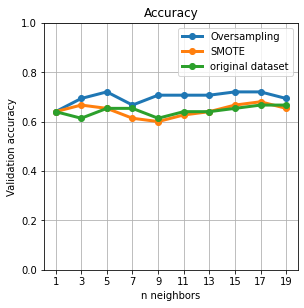

In [ ]:
print("K-Fold cross-validation metrics (5 folds)")
plt.figure(figsize=(10, 10))

# accuracy
plt.subplot(2, 2, 1)    
plt.plot(list(n_neigh), rs_acc, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_acc, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_acc, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)




plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation accuracy")
plt.xlabel("n neighbors")
plt.title("Accuracy")

Text(0.5, 1.0, 'Precision')

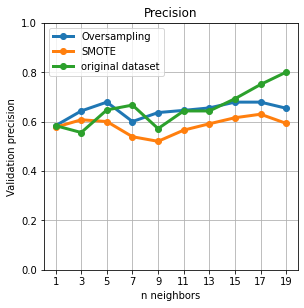

In [ ]:
# precision
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)   
plt.plot(list(n_neigh), rs_pre, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_pre, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_pre, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)

plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation precision")
plt.xlabel("n neighbors")
plt.title("Precision")


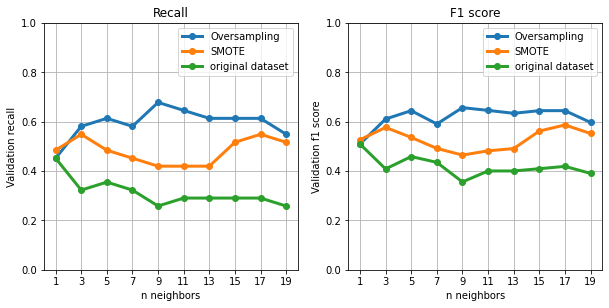

In [ ]:
# recall
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)    
plt.plot(list(n_neigh), rs_rec, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_rec, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_rec, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)

plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation recall")
plt.xlabel("n neighbors")
plt.title("Recall")

# f1 score
plt.subplot(2, 2, 4)    
plt.plot(list(n_neigh), rs_f1, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_f1, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_f1, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)

plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation f1 score")
plt.xlabel("n neighbors")
plt.title("F1 score");


#Naive Bayes

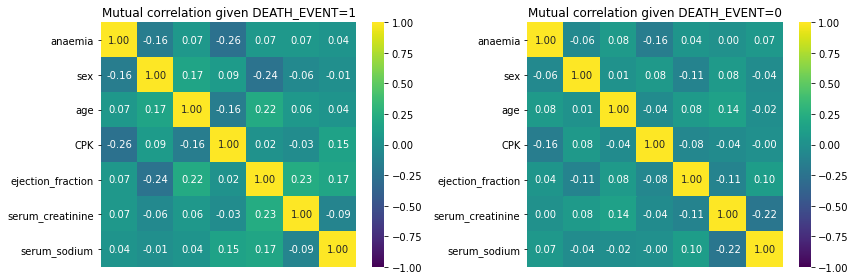

In [ ]:
dead = hf_norm[hf_norm["DEATH_EVENT"]==1][all_features].corr(method='pearson')
alive = hf_norm[hf_norm["DEATH_EVENT"]==0][all_features].corr(method='pearson')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Mutual correlation given DEATH_EVENT=1")
sns.heatmap(dead, vmin=-1, vmax=1, annot=True, xticklabels=False, cmap='viridis', fmt='.2f')

plt.subplot(1, 2, 2)
plt.title("Mutual correlation given DEATH_EVENT=0")
sns.heatmap(alive, vmin=-1, vmax=1, annot=True, xticklabels=False, cmap='viridis', fmt='.2f')

plt.tight_layout()

Kernerl Density

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

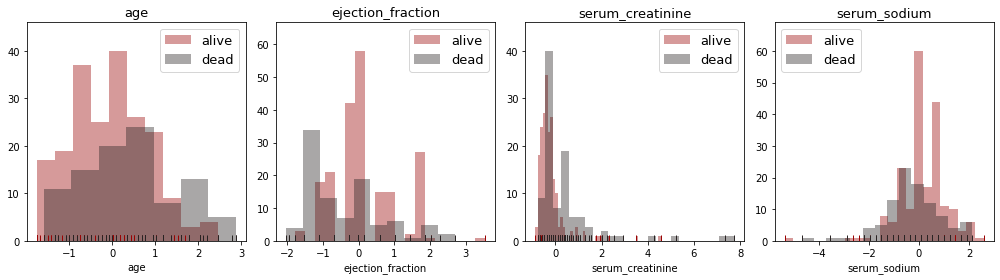

In [ ]:
feats = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium"]

fig, axs = plt.subplots(1, 4)
fig.set_size_inches(14, 4);

for j, ax in enumerate(axs):
    ax.set_title(feats[j], fontsize=13)
    sns.distplot(hf_norm.loc[hf["DEATH_EVENT"]==0, feats[j]], ax=ax, label="alive", color = "#990303", kde=False, rug=True)
    sns.distplot(hf_norm.loc[hf["DEATH_EVENT"]==1, feats[j]], ax=ax, label="dead", color = "#292323", kde=False, rug=True)
    ax.legend(prop={'size': 13})
    
fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, display

%matplotlib notebook
plt.ioff()
fig, axs = plt.subplots(1, 4);
%matplotlib inline 
plt.ion()

bws = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
feats = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium"]
ylims = [0.8, 1, 1.75, 0.9]

fig.set_size_inches(14, 4);
def animate_func(i):    
    for j, ax in enumerate(axs):        
        ax.clear()        
        ax.set_ylim(0, ylims[j])
        sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==0, feats[j]], ax=ax,
                label="alive", color = "#990303", shade=True, kernel="gau", cut=0, bw=bws[i])
        sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==1, feats[j]], ax=ax,
                label="dead",  color = "#292323", shade=True, kernel="gau", cut=0, bw=bws[i])
        ax.set_xlabel(f"bandwidth: {bws[i]}")
        ax.set_title(feats[j])
        
    fig.tight_layout()
    return[fig]
anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(bws),
                               interval = 500, # in ms
                               );
display(HTML(anim.to_jshtml()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

Bandwidth rule of thumb There is also a rule of thumb for the selection of the best bandwidth in the case of gaussian kernel and gaussian estimated distribution

In [ ]:
rot = lambda s: 1.06*np.std(s)*len(s)**(-0.2)

feats = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium", "CPK"]

for feat in feats:
    
    h = rot(hf_norm.loc[hf["DEATH_EVENT"]==0, feat])
    print(f"{feat}: {np.round(h, 2)}")

age: 0.33
ejection_fraction: 0.34
serum_creatinine: 0.23
serum_sodium: 0.33
CPK: 0.28


In [ ]:
from scipy.stats import gaussian_kde, norm

class bernoulli:  
    prob0, prob1 = None, None
    
    def __init__(self, samples):
        if isinstance(samples, list):
            if len(set(samples))!=2:
                print("not binary")
                return None
            
            counts = np.unique(samples, return_counts=True)
            self.prob0 = counts[1][0]/len(samples)
            self.prob1 = 1-self.prob0            
        else:
            if isinstance(samples, float):     
                self.prob1 = samples
                self.prob0 = 1-self.prob1

    def evaluate(self, x):
        if x==0:
            return self.prob0
        if x==1:
            return self.prob1
        return None
    
class MyNaiveBayes:  
    prior = None
    categorical = []
    distributions = {}
    columns = []
    
    def __init__(self, prior, categorical, bw=None):
        self.prior=bernoulli(prior)
        self.categorical = categorical
        
        if bw is not None:
            self.bw = bw
        else:
            self.bw="scott"
        
    def fit(self, X, y):
        self.columns = list(X.columns)
        
        for i, col in enumerate(self.columns):
            data = X[col]
            
            if(self.categorical[i]):
                distr0 = bernoulli(list(data[y==0]))
                distr1 = bernoulli(list(data[y==1]))
            else:
                distr0 = gaussian_kde(data[y==0], bw_method=self.bw)
                distr1 = gaussian_kde(data[y==1], bw_method=self.bw)
            
            self.distributions[col] = (distr0, distr1)
    
    def predict_proba(self, X):
        probs = []
        
        for _, sample in X.iterrows():
            score0 = 1
            score1 = 1
            
            for col in self.columns:
                score0 *= self.distributions[col][0].evaluate(sample[col])
                score1 *= self.distributions[col][1].evaluate(sample[col])

            score0 *= self.prior.evaluate(0)
            score1 *= self.prior.evaluate(1)
            
            prob1 = score1/(score0+score1)        
            probs.append(prob1)
            
        return np.array(probs)
     
    def predict(self, X):
        probs = self.predict_proba(X)
        probs[probs>=0.5] = 1
        probs[probs<0.5] = 0
        return probs

In [ ]:
gauss = norm(0, 1)
prior = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

no_rs_acc, no_rs_pre, no_rs_rec, no_rs_f1= [], [], [], []
rs_acc, rs_pre, rs_rec, rs_f1= [], [], [], []
sm_acc, sm_pre, sm_rec, sm_f1= [], [], [], []

for i in range(len(bws)):
    # original
    for p in prior:
        nb = MyNaiveBayes(prior = p, categorical=(True, True, False, False, False, False, False, False), bw=bws[i])
        nb.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
        preds = nb.predict(ho_val_df[all_features])

        no_rs_acc.append(accuracy_score(preds, ho_val_df['DEATH_EVENT']))
        no_rs_pre.append(precision_score(preds, ho_val_df['DEATH_EVENT']))
        no_rs_rec.append(recall_score(preds, ho_val_df['DEATH_EVENT']))
        no_rs_f1.append(f1_score(preds, ho_val_df['DEATH_EVENT']))

    # oversampling
    for p in prior:
        nb = MyNaiveBayes(prior = p, categorical=(True, True, False, False, False, False, False, False), bw=bws[i])
        nb.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])
        preds = nb.predict(ho_val_df[all_features])

        rs_acc.append(accuracy_score(preds, ho_val_df['DEATH_EVENT']))
        rs_pre.append(precision_score(preds, ho_val_df['DEATH_EVENT']))
        rs_rec.append(recall_score(preds, ho_val_df['DEATH_EVENT']))
        rs_f1.append(f1_score(preds, ho_val_df['DEATH_EVENT']))

    # SMOTE
    for p in prior:
        nb = MyNaiveBayes(prior = p, categorical=(True, True, False, False, False, False, False, False), bw=bws[i])
        nb.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])
        preds = nb.predict(ho_val_df[all_features])

        sm_acc.append(accuracy_score(preds, ho_val_df['DEATH_EVENT']))
        sm_pre.append(precision_score(preds, ho_val_df['DEATH_EVENT']))
        sm_rec.append(recall_score(preds, ho_val_df['DEATH_EVENT']))
        sm_f1.append(f1_score(preds, ho_val_df['DEATH_EVENT'])) 

In [ ]:
# initialize kfold object

kfold = KFold(all_features_kfold, random_state=42)

In [ ]:
print("K-Fold cross-validation metrics (5 folds)")
%matplotlib notebook
plt.ioff()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2);
%matplotlib inline 
plt.ion()

fig.set_size_inches(7, 7);
def animate_func(i):

    x = np.linspace(-3, 3, 1000)
    y = (gauss.pdf(x/bws[i]))/bws[i]
    
    ax1.clear()
    ax1.set_title("Gaussian kernel")
    ax1.plot(x, y, color='#990303', linewidth=1.5, label=f"bandwidth={bws[i]}")
    ax1.fill_between(x, 0, y, alpha=0.15, color='#990303')
    ax1.set_ylim(0, 4.1)
    ax1.set_xlim(-3.5, 3.5)
    ax1.legend(loc=1, fontsize=8)
    
    # original
    acc, pre, rec, f1= [], [], [], []
    for p in prior:
        nb = MyNaiveBayes(prior = p, categorical=(True, True, False, False, False, False, False), bw=bws[i])
        accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                          threshold=0.5, resampling=None)
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        f1.append(f1_s)
        
    ax2.clear()
    ax2.set_ylim(0, 1)
    ax2.set_title("Original")
    ax2.set_xlabel("Prior class probability P(DEATH_EVENT=1)")
    
    ax2.plot(list(prior), acc, label="accuracy", marker='o', linewidth=2)
    ax2.plot(list(prior), pre, label="precision", marker='o', linewidth=1, alpha=0.5)
    ax2.plot(list(prior), rec, label="recall", marker='o', linewidth=1, alpha=0.5)
    ax2.plot(list(prior), f1, label="f1 score", marker='o', linewidth=1)
    ax2.legend(loc=4, fontsize=8)
    ax2.grid()

    # oversampling
    acc, pre, rec, f1= [], [], [], []
    for p in prior:
        nb = MyNaiveBayes(prior = p, categorical=(True, True, False, False, False, False, False), bw=bws[i])
        accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                          threshold=0.5, resampling="oversampling")
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        f1.append(f1_s)
        
    ax3.clear()
    ax3.set_ylim(0, 1)
    ax3.set_title("Random oversampling")
    ax3.set_xlabel("Prior class probability P(DEATH_EVENT=1)")
    
    ax3.plot(list(prior), acc, label="accuracy", marker='o', linewidth=2)
    ax3.plot(list(prior), pre, label="precision", marker='o', linewidth=1, alpha=0.5)
    ax3.plot(list(prior), rec, label="recall", marker='o', linewidth=1, alpha=0.5)
    ax3.plot(list(prior), f1, label="f1 score", marker='o', linewidth=1)
    ax3.legend(loc=4, fontsize=8)
    ax3.grid()

    # smote
    acc, pre, rec, f1= [], [], [], []
    for p in prior:
        nb = MyNaiveBayes(prior = p, categorical=(True, True, False, False, False, False, False), bw=bws[i])
        accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                        threshold=0.5, resampling="SMOTE", cached="True")
        acc.append(accuracy)
        pre.append(precision)
        rec.append(recall)
        f1.append(f1_s)
        
    ax4.clear()
    ax4.set_ylim(0, 1)
    ax4.set_title("SMOTE")
    ax4.set_xlabel("Prior class probability P(DEATH_EVENT=1)")
    
    ax4.plot(list(prior), acc, label="accuracy", marker='o', linewidth=2)
    ax4.plot(list(prior), pre, label="precision", marker='o', linewidth=1, alpha=0.5)
    ax4.plot(list(prior), rec, label="recall", marker='o', linewidth=1, alpha=0.5)
    ax4.plot(list(prior), f1, label="f1 score", marker='o', linewidth=1)
    ax4.legend(loc=4, fontsize=8)
    ax4.grid()
    
    fig.tight_layout()
    return [fig]
    
anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(bws),
                               interval = 500, # in ms
                               );
HTML(anim.to_jshtml())

K-Fold cross-validation metrics (5 folds)


# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# original
no_rs_acc, no_rs_pre, no_rs_rec, no_rs_f1= [], [], [], []
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    nb.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
    preds = nb.predict(ho_val_df[all_features])
    no_rs_acc.append(accuracy_score(preds, ho_val_df['DEATH_EVENT']))
    no_rs_pre.append(precision_score(preds, ho_val_df['DEATH_EVENT']))
    no_rs_rec.append(recall_score(preds, ho_val_df['DEATH_EVENT']))
    no_rs_f1.append(f1_score(preds, ho_val_df['DEATH_EVENT']))
    

# oversampling
rs_acc, rs_pre, rs_rec, rs_f1= [], [], [], []
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    nb.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])
    preds = nb.predict(ho_val_df[all_features])
    rs_acc.append(accuracy_score(preds, ho_val_df['DEATH_EVENT']))
    rs_pre.append(precision_score(preds, ho_val_df['DEATH_EVENT']))
    rs_rec.append(recall_score(preds, ho_val_df['DEATH_EVENT']))
    rs_f1.append(f1_score(preds, ho_val_df['DEATH_EVENT']))

# smote
sm_acc, sm_pre, sm_rec, sm_f1= [], [], [], []
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    nb.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])
    preds = nb.predict(ho_val_df[all_features])
    sm_acc.append(accuracy_score(preds, ho_val_df['DEATH_EVENT']))
    sm_pre.append(precision_score(preds, ho_val_df['DEATH_EVENT']))
    sm_rec.append(recall_score(preds, ho_val_df['DEATH_EVENT']))
    sm_f1.append(f1_score(preds, ho_val_df['DEATH_EVENT']))

K-Fold cross-validation metrics (5 folds)


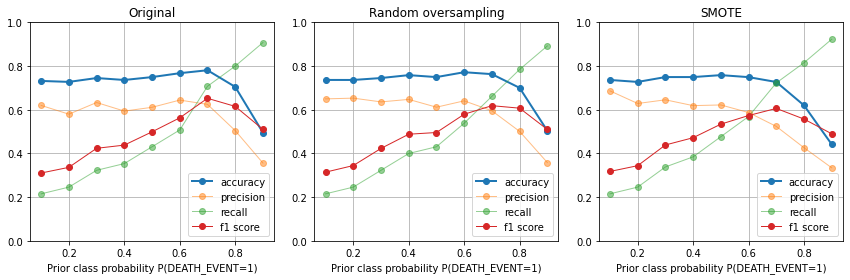

In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
# k fold
print("K-Fold cross-validation metrics (5 folds)")

plt.figure(figsize=(12, 4))

# original
acc, pre, rec, f1= [], [], [], []
    
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                          threshold=0.5, resampling=None)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    f1.append(f1_s)
    
plt.subplot(1, 3, 1)
plt.ylim(0, 1)
plt.title("Original")
plt.xlabel("Prior class probability P(DEATH_EVENT=1)")
    
plt.plot(list(prior), acc, label="accuracy", marker='o', linewidth=2)
plt.plot(list(prior), pre, label="precision", marker='o', linewidth=1, alpha=0.5)
plt.plot(list(prior), rec, label="recall", marker='o', linewidth=1, alpha=0.5)
plt.plot(list(prior), f1, label="f1 score", marker='o', linewidth=1)
plt.legend()
plt.grid()

# oversampling
acc, pre, rec, f1= [], [], [], []
    
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                          threshold=0.5, resampling="oversampling")
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    f1.append(f1_s)
    
plt.subplot(1, 3, 2)
plt.ylim(0, 1)
plt.title("Random oversampling")
plt.xlabel("Prior class probability P(DEATH_EVENT=1)")
    
plt.plot(list(prior), acc, label="accuracy", marker='o', linewidth=2)
plt.plot(list(prior), pre, label="precision", marker='o', linewidth=1, alpha=0.5)
plt.plot(list(prior), rec, label="recall", marker='o', linewidth=1, alpha=0.5)
plt.plot(list(prior), f1, label="f1 score", marker='o', linewidth=1)
plt.legend()
plt.grid()

# smote
acc, pre, rec, f1= [], [], [], []
    
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                                          threshold=0.5, resampling="SMOTE", cached=True)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    f1.append(f1_s)

plt.subplot(1, 3, 3)
plt.ylim(0, 1)
plt.title("SMOTE")
plt.xlabel("Prior class probability P(DEATH_EVENT=1)")
    
plt.plot(list(prior), acc, label="accuracy", marker='o', linewidth=2)
plt.plot(list(prior), pre, label="precision", marker='o', linewidth=1, alpha=0.5)
plt.plot(list(prior), rec, label="recall", marker='o', linewidth=1, alpha=0.5)
plt.plot(list(prior), f1, label="f1 score", marker='o', linewidth=1)
plt.legend()
plt.grid()

plt.tight_layout()

In [ ]:
no_rs_acc, no_rs_pre, no_rs_rec, no_rs_f1= [], [], [], []
rs_acc, rs_pre, rs_rec, rs_f1= [], [], [], []
sm_acc, sm_pre, sm_rec, sm_f1= [], [], [], []


# original
for p in prior:
    nb = GaussianNB(priors=[1-p, p])
    accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                              threshold=0.5, resampling=None)
    no_rs_acc.append(accuracy)
    no_rs_pre.append(precision)
    no_rs_rec.append(recall)
    no_rs_f1.append(f1_s)

    # oversampling
for p in prior:
        nb = GaussianNB(priors=[1-p, p])

        accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                              threshold=0.5, resampling="oversampling")
        rs_acc.append(accuracy)
        rs_pre.append(precision)
        rs_rec.append(recall)
        rs_f1.append(f1_s)

        # smote
for p in prior:
        nb = GaussianNB(priors=[1-p, p])

        accuracy, precision, recall, f1_s = kfold.fit_predict(nb, ho_train_df, ho_train_df['DEATH_EVENT'],
                                              threshold=0.5, resampling="SMOTE", cached="True")
        sm_acc.append(accuracy)
        sm_pre.append(precision)
        sm_rec.append(recall)
        sm_f1.append(f1_s)

In [ ]:
#sorted([(a, b) for a,b in zip(sm_acc, sm_f1)], key=lambda a: a[0]+a[1])

# Results and Conclusion

Here we can see the results obtained with different models and different rebalancing techniques for the Hearth Disease dataset.
Both accuracy and f1 score (inside parenthesis) are showed.

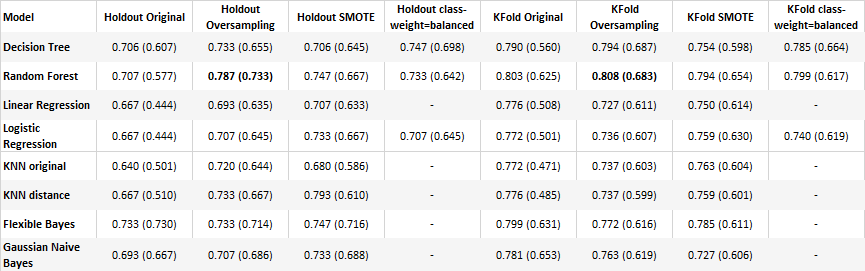

We can clearly see how using some rebalancing techniques the f1 score increase substancially.
In some cases SMOTE performs better with respect to random oversampling, and the opposite in others.
Furthermore, where is possible to apply it, also the use of the class-weight parameter increases the performances, sometimes outperforming the other techniques.

Then we noticed how using Gaussian Naive Bayes, even without respecting the hypothesis, leads to good results and also with a Bayes Classifier with KDE, the results are in line.

Best overall model seems to be the random forest trained on the oversampled dataset, that delivers the best results in terms of accuracy and f1 score.

For the models that allow it, it's possible to evaluate the ROC curve to select a threshold according to the main goal (minimize false positives or maximize true positives) but the results in the table are obtained by fixing the threshold at 0.5.



# Thank You